In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# reading the data into a pandas dataframe..

df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [6]:
df_train.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [7]:
df_test.tail()

,tweet_id,safe_text
5172,ZXVVNC5O,jenny mccarthy is on new years rockin eve. wha...
5173,ZYIANVI8,Measles reported in Clark Co. for 1st time sin...
5174,ZYITEHAH,<user> issues alert regarding Measles in TX. K...
5175,ZZ3BMBTG,I can't believe people don't vaccinate their k...
5176,ZZIYCVNH,"""<user> Alternatives to #Flu Vaccine <url> #n..."


In [8]:
# check for value counts so as to see the number of classes in the target/output variable..

df_train['label'].value_counts()

 0.000000    4908
 1.000000    4053
-1.000000    1038
 0.666667       1
Name: label, dtype: int64

This is a multiclass classification problem since there are more than two classes. Here we have 0, 1, -1, and 0.667.
But from the look of this dataset, we're supposed to predict between three(3) classes but we have four. This might be a data quality issue since the class 0.667 is not a valid class for this situation. It will be appropriate to remove that row from our dataset...

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   5177 non-null   object
 1   safe_text  5176 non-null   object
dtypes: object(2)
memory usage: 81.0+ KB


In [11]:
df_train.duplicated().sum(), df_train.isnull().sum()

(0,
 tweet_id     0
 safe_text    0
 label        1
 agreement    2
 dtype: int64)

In [12]:
df_test.duplicated().sum(), df_test.isnull().sum()

(0,
 tweet_id     0
 safe_text    1
 dtype: int64)

In [13]:
from pandas import isnull


df_test[df_test['safe_text'].isna() ]

,tweet_id,safe_text
2024,Dr. JAMES SHANNON,NaN


Clearly, tweet_id DR JAMES SHANNON is not a valid tweet_id and so it needs to be dropped from the datasets..

There seems to be few null values in both datasets.
let's first drop the null values..

In [14]:
df_train.dropna(axis=0, inplace=True)
df_test.dropna(axis=0, inplace=True)

In [15]:
df_train.isnull().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [16]:
df_test.isnull().sum()

tweet_id     0
safe_text    0
dtype: int64

In [17]:
df_train['label'].value_counts()

 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64

So, it appears that the value consisting of the null and invalid tweet_id was the same row which had an invalid class of 0.666667. it's been removed.

Data cleaning of tweets
1. Tokenization
2. Removing stopwords
3. Lemmatization
4. Stemming
5. Vectorization (TFID vectorizer) and so on...

In [18]:
df_train[['safe_text','label']].loc[45]

safe_text    CDC eyeing bird flu vaccine for humans, though...
label                                                      0.0
Name: 45, dtype: object

In [19]:
'Me &amp; The Big Homie mebbanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>'.strip()

'Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>'

In [20]:
df_train

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
...,...,...,...,...
9996,IU0TIJDI,Living in a time where the sperm I used to was...,1.0,1.000000
9997,WKKPCJY6,<user> <user> In spite of all measles outbrea...,1.0,0.666667
9998,ST3A265H,Interesting trends in child immunization in Ok...,0.0,1.000000
9999,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.0,1.000000


We dont need the tweet_id and the agreement columns so it'll be dropped..

In [21]:
df_train.drop(['tweet_id', 'agreement'], axis=1, inplace=True)

In [22]:
df_train

,safe_text,label
0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0
1,I'm 100% thinking of devoting my career to pro...,1.0
2,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0
3,I mean if they immunize my kid with something ...,-1.0
4,Thanks to <user> Catch me performing at La Nui...,0.0
...,...,...
9996,Living in a time where the sperm I used to was...,1.0
9997,<user> <user> In spite of all measles outbrea...,1.0
9998,Interesting trends in child immunization in Ok...,0.0
9999,CDC Says Measles Are At Highest Levels In Deca...,0.0


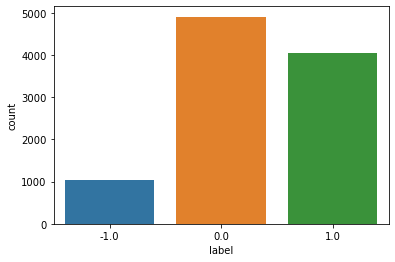

In [27]:
# Let's visualize the training dataset distribution..

sns.countplot(data=df_train, x='label');

The data is balance between the labels zeros(0's) and ones(1's) but with very few instances of neutral sentiments, which makes it unbalanced for anti-vaccine and pro-vaccine.
1 for pro vaccine(meaning they want the vaccine)
-1 for anti-vaccine(they don't want to vaccinate)
0 for neutral.
Since the dataset is imbalanced, let's handle that before we start processing the tweet text. We'll handle imbalance using the SMOTE(synthetic Minority Oversampling Technique). Below are the steps to following when using the SMOTE.
1. Choose a minority class as the input vector
2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
4. Repeat the steps until data is balanced

In a text dataset, SMOTE can't be applied from the start unless we do the vectorization of text and then convert them to numbers so that we can do the SMOTE to handle imbalanced dataset.. This will be done later in this project after getting the converting text to vectors.

In [37]:
# Now, let's plot the word cloud of this dataset..


sentences_list = list(df_train['safe_text'])

In [58]:
# convert list of sentences into a single sentence..

all_sentences = ''.join(sentence.lower() for sentence in sentences_list)

In building the wordcloud, we'll use the nltk stopwords function to capture all the stopwords in the wordcloud..

In [54]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sammy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [55]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [56]:
stop_words = set(stopwords.words('english'))

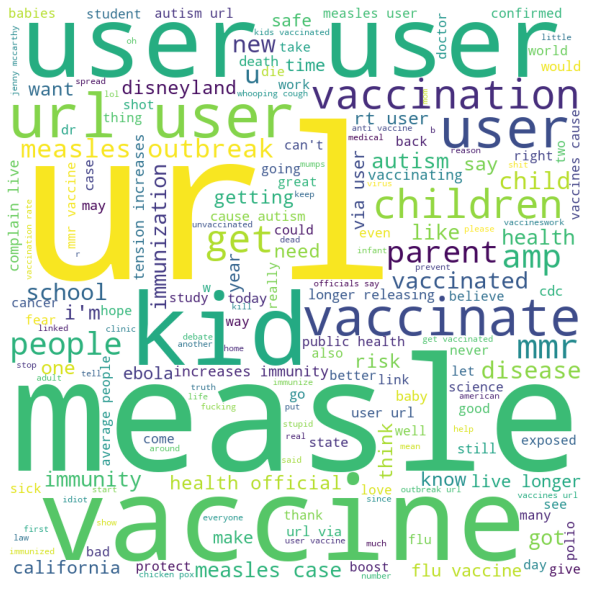

In [60]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_sentences)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

From the above wordcloud plotted, some of the most mentioned  words are measle, vaccinate, vaccine, case, flu, polio, kid, parent, people, school, immunization, health, longer, ebola, immunity, children, vaccinating, autism. Some of the words are not associated with the vaccination but are related to the witter platform. For instance, user, url, link, amp, via and so on..

In [ ]:
# let's do text preprocessing..
# 1. Tokenization ==> spliting a sentence into its individual words



In [32]:
# set x and y to the input data and output variable
from imblearn.over_sampling import SMOTE

x, y = df_train['safe_text'], df_train['label']

smote_technique = SMOTE()

x_smote, y_smote = smote_technique.fit_resample(x, y)

ValueError: could not convert string to float: 'Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>'